In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("./ca_housing_prices.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']



In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
train_data = x_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4575,-118.28,34.07,41.0,1072.0,331.0,1111.0,314.0,1.9233,<1H OCEAN,207100.0
10082,-120.22,39.35,8.0,1872.0,281.0,203.0,71.0,4.5882,INLAND,198400.0
19784,-122.89,40.76,14.0,712.0,131.0,270.0,90.0,2.3958,INLAND,102100.0
1262,-121.72,37.98,5.0,7105.0,1143.0,3523.0,1088.0,5.0468,INLAND,168800.0
578,-122.06,37.71,36.0,3541.0,570.0,1478.0,529.0,4.6350,NEAR BAY,248600.0
...,...,...,...,...,...,...,...,...,...,...
12078,-117.52,33.84,20.0,688.0,146.0,575.0,144.0,3.5500,INLAND,111000.0
5315,-118.43,34.06,31.0,1317.0,284.0,523.0,274.0,7.4219,<1H OCEAN,500001.0
4403,-118.23,34.07,35.0,1335.0,440.0,1586.0,445.0,1.9722,<1H OCEAN,156300.0
13290,-117.66,34.07,36.0,2072.0,408.0,964.0,395.0,2.8702,INLAND,137000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

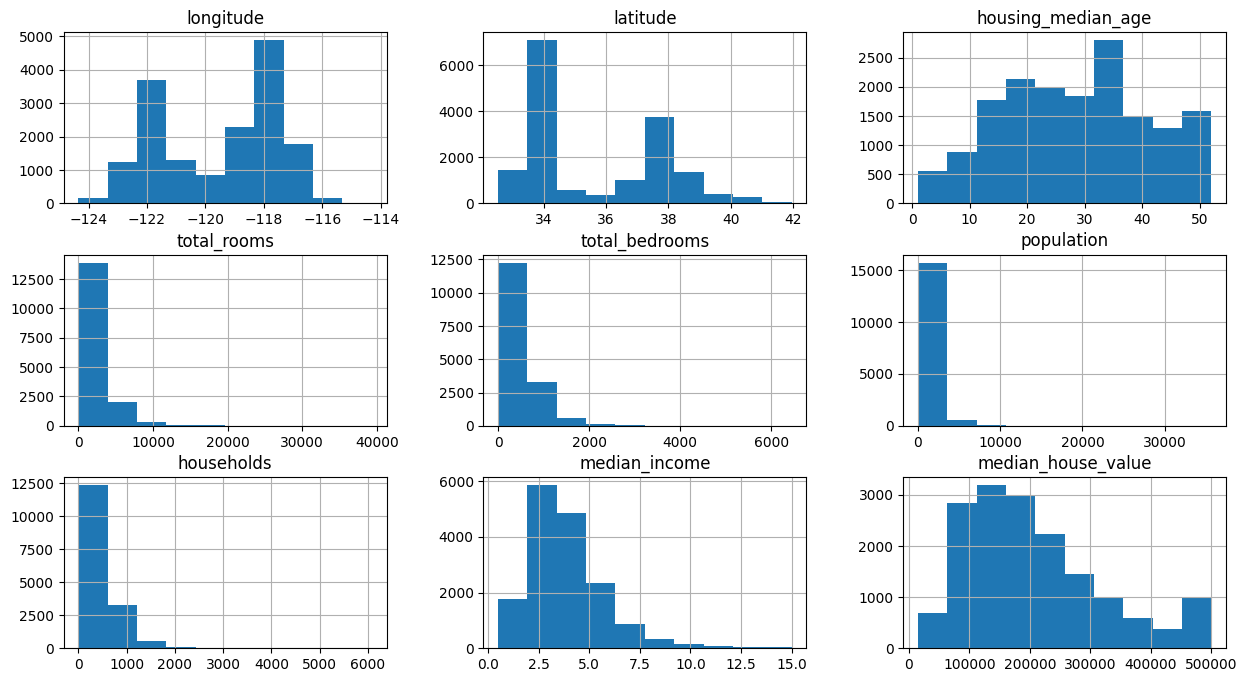

In [19]:
train_data.hist(figsize=(15, 8))

In [21]:
train_data = train_data.select_dtypes(include='number')
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925410,-0.111616,0.046126,0.071082,0.101254,0.058107,-0.014480,-0.044449
latitude,-0.925410,1.000000,0.013098,-0.036325,-0.067393,-0.109260,-0.072512,-0.080106,-0.143890
housing_median_age,-0.111616,0.013098,1.000000,-0.359180,-0.320277,-0.294812,-0.302671,-0.113960,0.110246
total_rooms,0.046126,-0.036325,-0.359180,1.000000,0.930917,0.855851,0.919915,0.195896,0.130623
total_bedrooms,0.071082,-0.067393,-0.320277,0.930917,1.000000,0.879137,0.980196,-0.010310,0.047030
population,0.101254,-0.109260,-0.294812,0.855851,0.879137,1.000000,0.907521,0.002398,-0.027721
households,0.058107,-0.072512,-0.302671,0.919915,0.980196,0.907521,1.000000,0.011045,0.062248
median_income,-0.014480,-0.080106,-0.113960,0.195896,-0.010310,0.002398,0.011045,1.000000,0.686710
median_house_value,-0.044449,-0.143890,0.110246,0.130623,0.047030,-0.027721,0.062248,0.686710,1.000000


<Axes: >

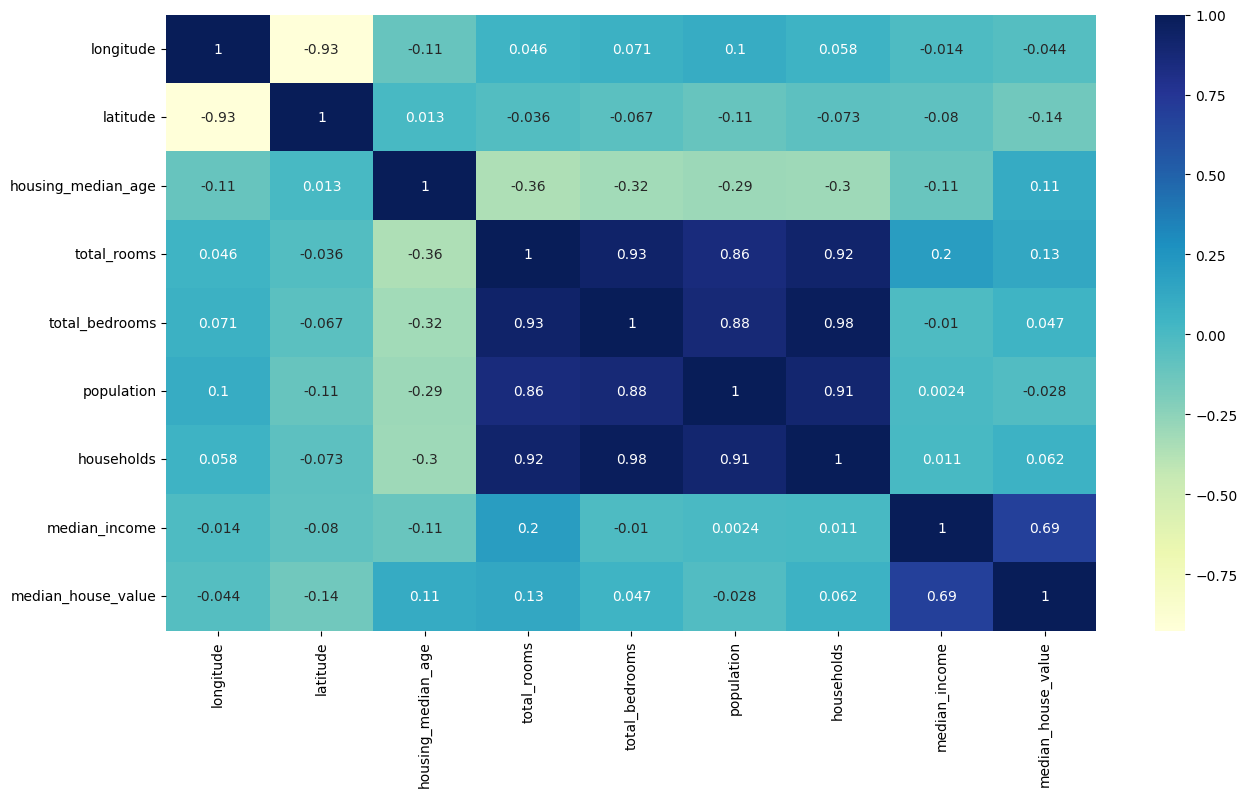

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [29]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

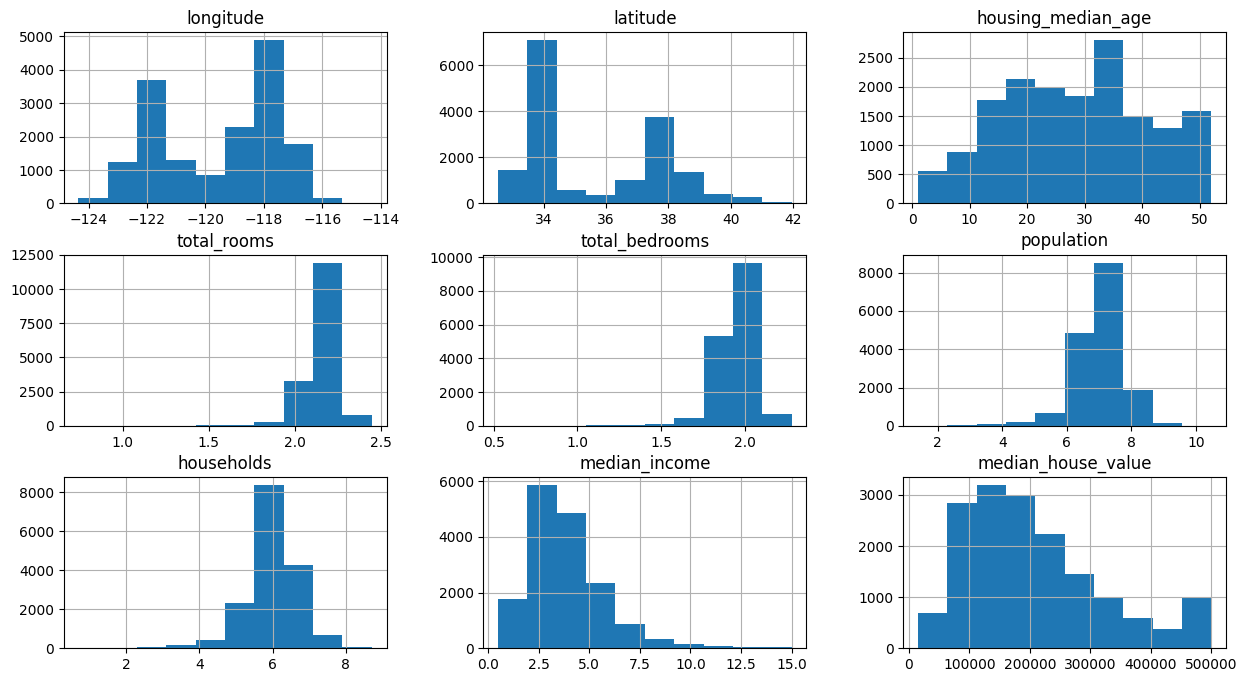

In [30]:
train_data.hist(figsize=(15, 8))